<a href="https://colab.research.google.com/github/EduBrazGomes/ProjetoIntegrador/blob/main/Questao5_Projeto_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [12]:
url = "https://raw.githubusercontent.com/EduBrazGomes/ProjetoIntegrador/refs/heads/main/dataset_doenca_cardiaca_realista_500.csv"
df = pd.read_csv(url)
print(df.head(10))

   Idade  Pressão_Arterial  Colesterol  Frequência_Cardíaca  Doença_Cardíaca
0     68               135         201                   73                0
1     58               129         221                   90                1
2     44               112         191                   76                0
3     72               110         200                   74                1
4     37               109         177                   79                0
5     50               121         210                   93                0
6     68               129         208                   83                1
7     48               126         199                   88                0
8     52               140         207                   83                1
9     40               119         187                   80                1


In [13]:
x = df.drop('Doença_Cardíaca', axis=1)
y = df['Doença_Cardíaca']


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(x_test)

In [17]:
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão: \n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação: \n", classification_report(y_test, y_pred))

Acurácia:  0.72

Matriz de confusão: 
 [[55 16]
 [26 53]]

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        71
           1       0.77      0.67      0.72        79

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.73      0.72      0.72       150



AUC: 0.7977357817792833


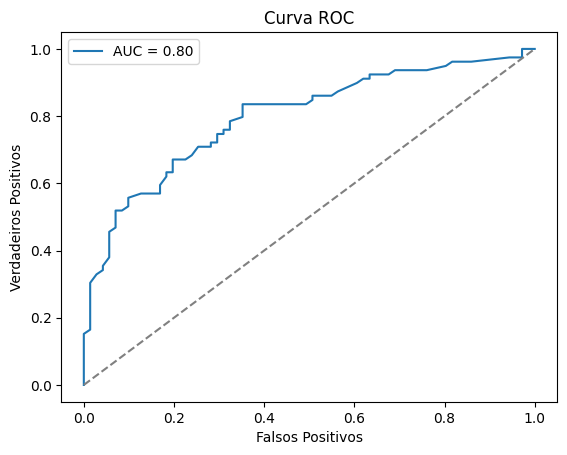

In [18]:
y_prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()